# Data Analysis Challenge

## Part 1 - General Visualisation

In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [208]:
data = pd.read_csv('takehome.csv')

In [209]:
print(data.shape)
data.head()

(9999, 4)


,ltv,ttime,abt,tue
0,"{""n"":""250""}","{""n"":""1077572""}","{""n"":""31""}","{""n"":""38""}"
1,"{""n"":""49""}","{""n"":""60028""}","{""n"":""32""}","{""n"":""15""}"
2,"{""n"":""680""}","{""n"":""2018285""}","{""n"":""7""}","{""n"":""46""}"
3,"{""n"":""125""}","{""n"":""98142""}","{""n"":""11""}","{""n"":""15""}"
4,"{""n"":""450""}","{""n"":""115692""}","{""n"":""9""}","{""n"":""15""}"


In [210]:
data.info() 
print(data.apply(lambda x: sum(x.isnull()),axis=0)) # a few null values
print('Cell information is:', type(data.ltv[0])) # checking if dataframe values are dictionaries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
ltv      9998 non-null object
ttime    9999 non-null object
abt      9999 non-null object
tue      9997 non-null object
dtypes: object(4)
memory usage: 312.5+ KB
ltv      1
ttime    0
abt      0
tue      2
dtype: int64
Cell information is: <class 'str'>


In [211]:
# cleaning columns
data = data.replace([r'{"n":"', r'"}'], '', regex=True)
data = data.astype('float64')
data = data.dropna() # drop three rows with missing values
print('Correlation between columns:', '\n', data.corr(), '\n') # 
print('Column information: ', '\n', data.describe()) # Many outliers for ltv, ttime and tue columns

Correlation between columns: 
             ltv     ttime       abt       tue
ltv    1.000000  0.434548 -0.006529  0.580597
ttime  0.434548  1.000000 -0.017247  0.811910
abt   -0.006529 -0.017247  1.000000 -0.034958
tue    0.580597  0.811910 -0.034958  1.000000 

Column information:  
                ltv         ttime          abt           tue
count  9996.000000  9.996000e+03  9996.000000   9996.000000
mean    388.548219  1.455021e+07    30.284314    193.528311
std     417.700380  6.361143e+07    17.402454    551.032452
min       0.000000  0.000000e+00     1.000000     15.000000
25%     200.000000  1.148820e+05    15.000000     15.000000
50%     250.000000  8.482985e+05    30.000000     33.000000
75%     450.000000  4.450682e+06    45.000000    118.250000
max    8481.000000  1.735807e+09    60.000000  10563.000000


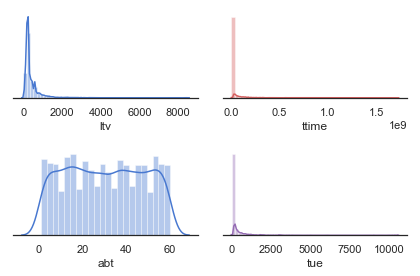

In [212]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, sharex=False)
sns.despine(left=True)

# Plot a simple distribution plots for big picture
sns.distplot(data.ltv,  color="b", ax=axes[0, 0])
sns.distplot(data.ttime, color="r", ax=axes[0, 1])
sns.distplot(data.abt, ax=axes[1, 0])
sns.distplot(data.tue, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

In [213]:
# Bucketizing abt
control = list(range(0, 7))+ list(range(55,61))
New_economy_1 = list(range(7,15))+ list(range(19,35))
New_economy_2 = list(range(15,17))+ list(range(35, 45))
New_economy_3 = list(range(17,19))+ list(range(45,55))

data.abt = data.abt.replace(control, 'control').replace(New_economy_1, 'New_economy_1').replace(New_economy_2, 'New_economy_2').replace(New_economy_3, 'New_economy_3')

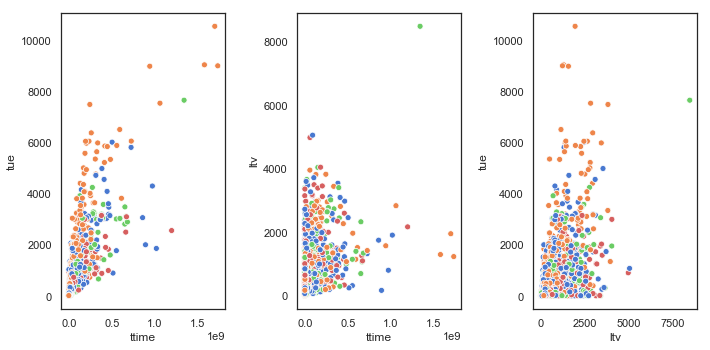

In [242]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 3, figsize=(10, 5))

# Plot a simple distribution plots for big picture
sns.scatterplot(x= 'ttime', y = 'tue', hue = 'abt', data = data, ax=axes[0], legend=False)
sns.scatterplot(x= 'ttime', y = 'ltv', hue = 'abt', data = data, ax=axes[1], legend=False)
sns.scatterplot(x= 'ltv', y = 'tue', hue = 'abt', data = data, ax=axes[2], legend=False)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

# Orange: control, Blue: economy 1, Green: economy 2, Red: economy 3

No major trend can be seen from the scatterplots although the control group seems to have greater tue per ttime as well as overall tue. Let's look at boxplots.

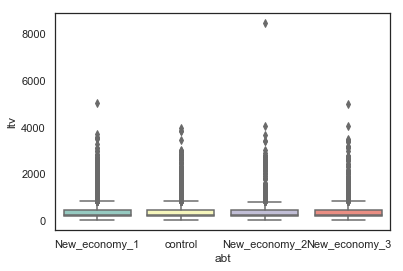

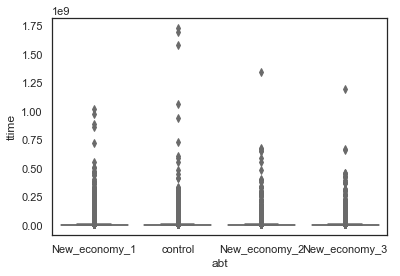

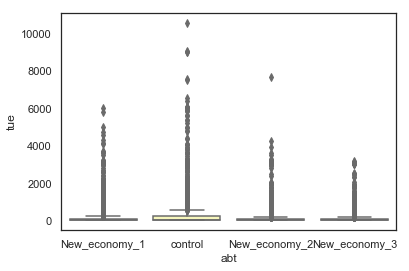

In [214]:
sns.boxplot(x="abt", y="ltv", data=data, palette="Set3")
plt.show();
sns.boxplot(x="abt", y="ttime", data=data, palette="Set3")
plt.show();
sns.boxplot(x="abt", y="tue", data=data, palette="Set3")
plt.show();

In [245]:
print('New economy 1 information: ', '\n', data[data.abt == "New_economy_1"].describe())
print('New economy 2 information: ', '\n', data[data.abt == "New_economy_2"].describe())
print('New economy 3 information: ', '\n', data[data.abt == "New_economy_3"].describe())
print('Control information: ', '\n', data[data.abt == "control"].describe())

New economy 1 information:  
                ltv         ttime          tue
count  3916.000000  3.916000e+03  3916.000000
mean    382.758938  1.307065e+07   166.136108
std     392.564889  5.321491e+07   429.531092
min      12.000000  0.000000e+00    15.000000
25%     200.000000  1.079845e+05    15.000000
50%     250.000000  8.196980e+05    31.000000
75%     450.000000  4.447216e+06   110.250000
max    5055.000000  1.020310e+09  6028.000000
New economy 2 information:  
                ltv         ttime          tue
count  2053.000000  2.053000e+03  2053.000000
mean    387.160253  1.415490e+07   144.070141
std     441.699037  5.964837e+07   414.621042
min       0.000000  0.000000e+00    15.000000
25%     180.000000  1.119860e+05    15.000000
50%     250.000000  8.106680e+05    25.000000
75%     430.000000  4.659234e+06    92.000000
max    8481.000000  1.343444e+09  7670.000000
New economy 3 information:  
                ltv         ttime          tue
count  2009.000000  2.009000e+03  20

Control is the group that gives the most tue, and therefore, seems like the worst option. Economy 3 has the least amount of outliers regarding tue while maintaining good ltv and ttime so it is probably the best option.

Doing A|B tests between the various distribution would enable us to choose whether we really want to switch economies according to the results.

## Part 2 - Game economy

#### → Question: Using takeHome.csv, can you provide insight on how the time spent and units earned should relate to GXP and PXP, to further optimize the Mistplay economy by maximizing the LTV of users, while minimizing the total units earned (tue)? 

* GXP is gained from spending time in a specific game.
* PXP is obtained by leveling up in a game
* Leveling up in mistplay platform is done by reaching PXP thresholds

GXP should be related to how easy it is to level up ingame. Expected PXP should affect how much GXP you get from leveling up for a specific game.

If we want to maximize ltv while minimizing tue, we want to minimize GXP over PXP (and set PXP proportional to how easy it is to level up for particular games), to make sure that people have to spend more time ingame (increase lvt) before getting more tue.

A regression model should give us insights into how time spent (ttime or GXP) and total units earned (tue) are connected to life time value. Doing a regression for the different economies, should let us know which economy (with the varying GXP and PXP setups) is better for us.

In [279]:
# separate economies
df = data.copy()
df1 = df[df.abt == 'New_economy_1']
df2 = df[df.abt == 'New_economy_2']
df3 = df[df.abt == 'New_economy_3']
df0 = df[df.abt == 'control']

for i in [df1, df2, df3, df0]:
    y = i['ltv']
    X = i[['ttime', 'tue']]
    model = LinearRegression().fit(X, y)
    print('for {}, linear regression coeficients are: '.format(eval(i)), model.coef_)

TypeError: eval() arg 1 must be a string, bytes or code object

In [273]:
model.coef_

array([-8.51612685e-07,  5.29243454e-01,  9.27201873e+00,  2.62749607e+01,
        3.15022312e+01, -6.70492106e+01])

From the coeficients, we can see that 

### Loading in sts

In [246]:
sts = pd.read_csv('sts.csv')

In [263]:
print(sts.shape)
sts.head()

# Not sure how sts is meant to be used in the context of the challenge.

(6091, 2)


,state,sts
0,1,"{""m"":{""com.utorrent.client.pro"":{""m"":{""d30"":{""..."
1,1,"{""m"":{""com.tetherstudios.solitaire.klondike"":{..."
2,0,"{""m"":{""com.ticketmaster.mobile.android.na"":{""m..."
3,0,"{""m"":{""com.ticketmaster.mobile.android.na"":{""m..."
4,1,"{""m"":{""flipboard.boxer.app"":{""m"":{""d30"":{""n"":""..."
